In [3]:
#Installing neccesary packages

#Installing a pacakge for creating connection strings to a remote database and another package for creating an enviroment to hide sensitive config info
%pip install pyodbc
%pip install python-dotenv

#Data Handling packages
%pip install pandas
%pip install numpy

#Visualiztion packages
%pip install matplotlib
%pip install seaborn

#Package for statitics 
%pip install scipy

%pip install scikit-learn
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\afari\onedrive\desktop\lp2-customer_churn_prediction\lp-two-project\env\lib\site-packages (0.13.0)




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Importing all necessary packages
import pyodbc

#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values

#importing data handling packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing pipeline
#importing statistical packages
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.impute   import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV


## A MACHINE LEARNING MODEL TO PREDICT CUSTOMER CHURN

The project aim is to develop a supervised machine learning model that analyse custommer attrition in Vodafone. This model main objective is to determine  accurately whether a customer will Churn or not. 
The purpose of this project is to identify probable customer churn, offer insightful information about customer behavior and  create a  proactive customer retention initiative.
The project's output will help Vodafone deal with customer turnover in a more knowledgeable and proactive manner.

The dataset contains information about:

Churn : Customers who left the company

Product and services the customer signed unto :PhoneService, MultipleLines	InternetService, OnlineSecurity, DeviceProtection, TechSupport,Streaming TV	Streaming Movies

Customer Information : Contract, PaperlessBilling, PaymentMethod, MonthlyCharges	TotalCharges

Demographics: age , gender, marital status , (With dependants or without dependants)

Customer Identidication :  A distinct identification number that identifies every customer.

Senior Citizen: States if the customer is old or not.

Dependants: Shows if a customer has dependants or not, ie parenets, children.

Monthly Tenure: Shows how long the customer has been with Vodafone

Total Charges: Monthly charges * each tenure

Multiple lines : Shows if the customes have multiple telephone lines with the company.


## HYPOTHESIS

Null Hypothesis: There is no significant relationship between customers churn and the type of contract

Alternative Hypothesis:  There is a significant relationship between customers churn and the type of contract


## ANALYTICAL QUESTIONS
1.What is the overall count of customers who have discontinues their services with the company?

2.Which contract type exhibits a higher number of customers who have left company ?

3.How does the rate of customer churn change in relation to the duration of their subscription?

4.Is there a correlation between the total charge accrued by customers and the type of contract they have?

5.What are the preferred payment method?




## 1st Step :Importing the libraries

In [5]:
#Importing all necessary packages
import pyodbc

#import the dotenv_values function from the dotenv package
from dotenv import dotenv_values

#importing data handling packages
import pandas as pd
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Loading environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

#Getting the values for the credentials you set in the '.env' file
server = environment_variables.get('server_name')
database = environment_variables.get('database')
username = environment_variables.get('user')
password = environment_variables.get('password')

#Creating a connection string
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

In [7]:
#establishing a connestion to the database using pyodbc library
connection = pyodbc.connect(connection_string)

## 2nd Step: Loading the datasets

In [8]:
#retrieving the data from database
query = 'Select * From dbo.LP2_Telco_churn_first_3000'
data_1 = pd.read_sql(query,connection)
data_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [9]:
#retrieving the second dataset from the github repository
data_2=pd.read_csv('LP2_Telco-churn-seconddd-2000.csv')
data_2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [10]:
#retrieving the third dataset(testing dataset) from OneDrive
data_3=pd.read_csv('Telcooo-churn-last-2000.csv')
data_3.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


EDA FOR DATA_1

In [11]:
data_1.shape

(3000, 21)

In [12]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [13]:
data_1[data_1.duplicated(keep=False)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
data_1.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [16]:
#0 means the customer has been with the company for less than one month
data_1['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [17]:
categorical_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for column in categorical_columns:
    data_1[column].fillna(data_1[column].mode()[0], inplace=True)

In [18]:
data_1.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               1
dtype: int64

In [19]:
#Since the unique vales of the Churn	 column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['Churn'] = data_1['Churn'].replace(mapping)
data_1['Churn'].unique()

array(['No', 'Yes', None], dtype=object)

In [20]:
#Since the unique vales of the PaperlessBilling	 column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['PaperlessBilling'] = data_1['PaperlessBilling'].replace(mapping)
data_1['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
#Since the unique vales of the StreamingMovies column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['StreamingMovies'] = data_1['StreamingMovies'].replace(mapping)
data_1['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
#Since the unique vales of the StreamingTV column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['StreamingTV'] = data_1['StreamingTV'].replace(mapping)
data_1['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
#Since the unique vales of the TechSupport column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['TechSupport'] = data_1['TechSupport'].replace(mapping)
data_1['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#Since the unique vales of the DeviceProtection column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['DeviceProtection'] = data_1['DeviceProtection'].replace(mapping)
data_1['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
#Since the unique vales of the OnlineSecurity column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['OnlineSecurity'] = data_1['OnlineSecurity'].replace(mapping)
data_1['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
#Since the unique vales of the InternetService column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['InternetService'] = data_1['InternetService'].replace(mapping)
data_1['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
#Since the unique vales of the MultipleLines column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['MultipleLines'] = data_1['MultipleLines'].replace(mapping)
data_1['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
#Since the unique vales of the Dependents column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['Dependents'] = data_1['Dependents'].replace(mapping)
data_1['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
#Since the unique vales of the SeniorCitizen column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 1,False: 0}
 
# Replacing values based on assumptions
data_1['SeniorCitizen'] = data_1['SeniorCitizen'].replace(mapping)
data_1['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [30]:
#Since the unique vales of the OnlineBackup column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['OnlineBackup'] = data_1['OnlineBackup'].replace(mapping)
data_1['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
#Since the unique vales of the Partner column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['Partner'] = data_1['Partner'].replace(mapping)
data_1['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
#Since the unique vales of the PhoneService column are in [True, False, 'No', 'Yes'],
#Assumptions: Change True == Yes and False == No
 
# Mapping dictionary to replace values
mapping = {True: 'Yes',False: 'No'}
 
# Replacing values based on assumptions
data_1['PhoneService'] = data_1['PhoneService'].replace(mapping)
data_1['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   int64  
 3   Partner           3000 non-null   object 
 4   Dependents        3000 non-null   object 
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   object 
 7   MultipleLines     3000 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   object 
 10  OnlineBackup      3000 non-null   object 
 11  DeviceProtection  3000 non-null   object 
 12  TechSupport       3000 non-null   object 
 13  StreamingTV       3000 non-null   object 
 14  StreamingMovies   3000 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   object 


 EDA FOR DATA_2

In [34]:
data_2.shape

(2043, 21)

In [35]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [36]:
data_2[data_2.duplicated(keep=False)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [37]:
data_2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
#changing the total charge data type from object to float
data_2['TotalCharges']=pd.to_numeric(data_2['TotalCharges'], errors='coerce').astype('float')

In [39]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [40]:
data_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,0,No,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25.250000,25.250000,No
2996,6620-JDYNW,Female,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,60.599998,1156.349976,No
2997,1891-FZYSA,Male,1,Yes,No,69,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.949997,6143.149902,Yes
2998,4770-UEZOX,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.750000,144.800003,No


In [41]:
data_2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.70,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.50,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.20,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.40,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Concatenating Data_1 and Data_2

In [42]:
final_df=pd.concat([data_1,data_2],axis=0,ignore_index=True)
final_df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No


In [43]:
final_df.shape

(5043, 21)

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


## Answering the analytical questions

1.Which payement method  has the highest churning rate?

1.What is the overall count of customers who have discontinues their services with the company?

2.Which contract type exhibits a higher number of customers who have left company ?

3.How does the rate of customer churn change in relation to the duration of their subscription?

4.Is there a correlation between the total charge accrued by customers and the type of contract they have?

5.What are the preferred payment method?

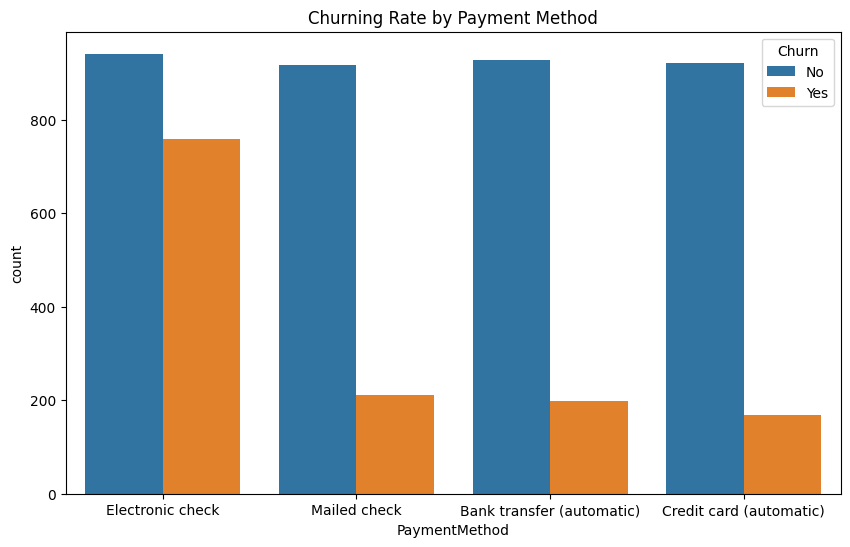

In [45]:
#Which payement method  has the highest churning rate?

#To find the highest churning rate of the payment method
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=final_df)
plt.title('Churning Rate by Payment Method')
plt.show()

The electronic check payment option hasbthe highest churn rate followed by the maill check, bank transfer and credit card. Management will want to look into the Electronis check option to see if customers are encountering any difficultty when making payment and address what ever the issue might be.

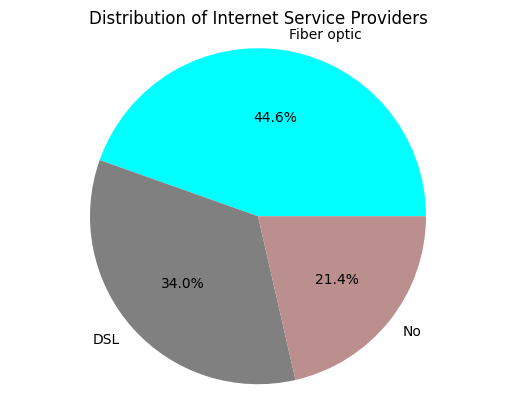

In [142]:
#Do any particular services have an appreciable effect on churn rates?

ISP_count = final_df['InternetService'].value_counts()

# Plot for the distribution of internet service providers
colors = ['cyan', 'grey', 'rosybrown']
plt.pie(ISP_count, labels=ISP_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Internet Service Providers')
plt.axis('equal')
plt.show()

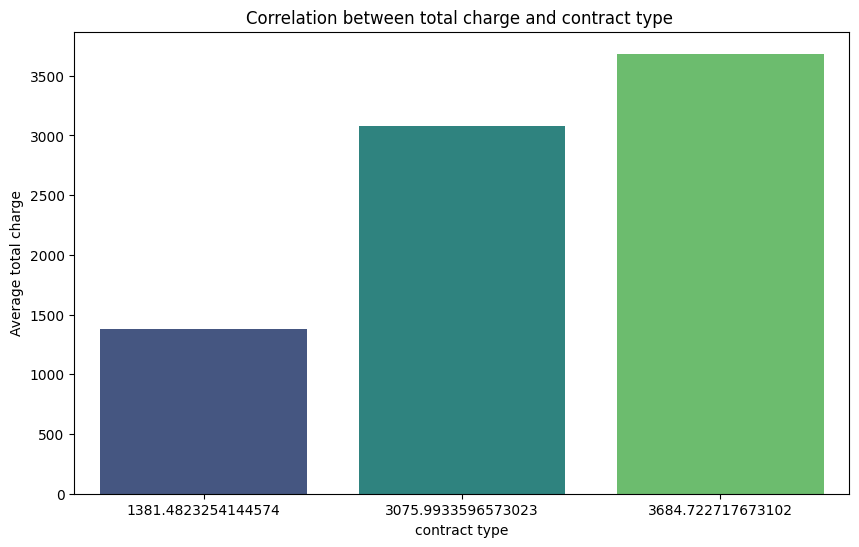

In [47]:
#4.Is there a correlation between the total charge accrued by customers and the type of contract they have?
correlation_df = final_df.groupby('Contract')['TotalCharges'].mean()

#plotting
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_df, y = correlation_df.values, palette= 'viridis')
plt.title('Correlation between total charge and contract type ')
plt.xlabel('contract type')
plt.ylabel('Average total charge')
plt.show()

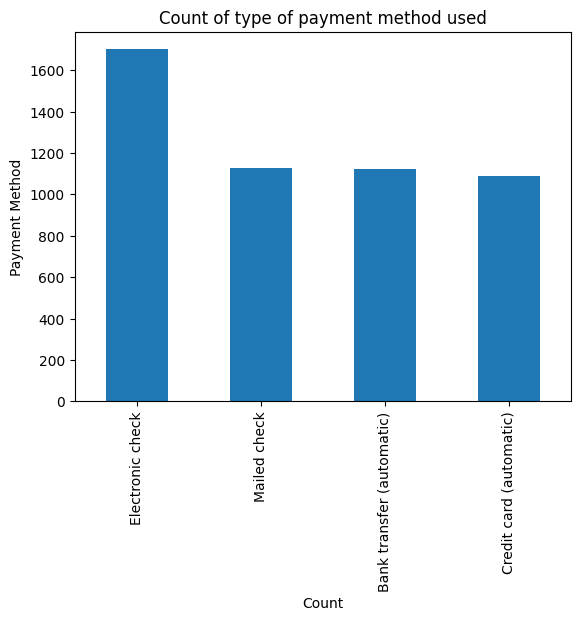

In [48]:
#which is the most used payment method for customers
most_payment_method = final_df['PaymentMethod'].value_counts()
most_payment_method

#Plotting a graph to show most common used Payment method
most_payment_method.plot(kind='bar')
plt.title('Count of type of payment method used')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

In [49]:
count_of_churn_customers = final_df['Churn'].value_counts()
count_of_churn_customers

Churn
No     3706
Yes    1336
Name: count, dtype: int64

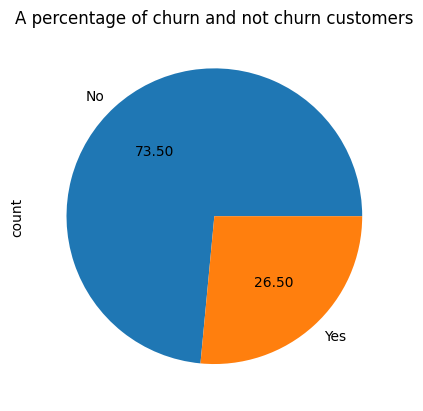

In [50]:
#1.What is the overall count of customers who have discontinues their services with the company?

#Plotting a pie chat
count_of_churn_customers.plot(kind='pie',autopct='%.2f')
plt.title('A percentage of churn and not churn customers')
plt.show()

In [51]:
#Summary statistics of numerical columns
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


# Insight
#Tenure: 
Customers' tenure ranges widely from 0 to 72 months, with an average of 32.57 months. 
The comparatively low median (29 months) indicates that most customers have tenures below the 75th percentile (56 months).

#Total Charges:
With a standard deviation of $2269.48 and an average of $2302.06, the total charges exhibit a wide range.
The high maximum amount of $8670.10 indicates that some clients have much greater total charges.
The mean ($2302.06) and median ($1401.15) differ noticeably, which could indicate skewness or possible outliers.

#Monthly Charges:
The monthly average charge is $65.09, with a $30.06 standard deviation. The monthly charges exhibit fluctuation within the range of $18.40 to $118.65. Given that the monthly price is higher than the median ($70.55), the distribution may be right-skewed.







Univariate Analysis

(array([4224.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         819.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

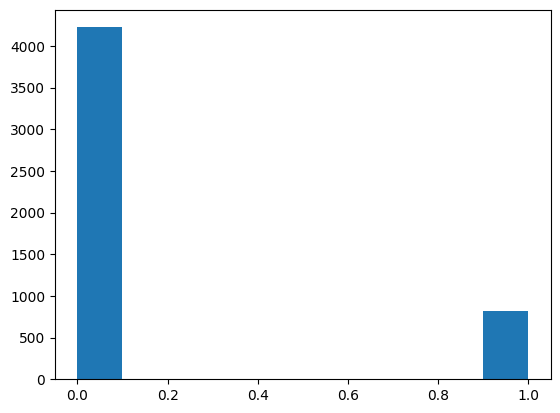

In [136]:
plt.hist(final_df['SeniorCitizen'])



(array([1132.,  143.,  258.,  449.,  336.,  633.,  688.,  645.,  547.,
         212.]),
 array([ 18.39999962,  28.42499981,  38.45      ,  48.47500019,
         58.50000038,  68.52500057,  78.55000076,  88.57500095,
         98.60000114, 108.62500134, 118.65000153]),
 <BarContainer object of 10 artists>)

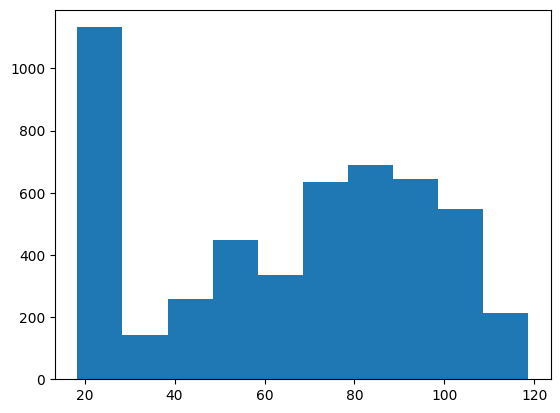

In [137]:
plt.hist(final_df['MonthlyCharges'])



(array([1139.,  547.,  397.,  395.,  365.,  354.,  333.,  347.,  372.,
         794.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

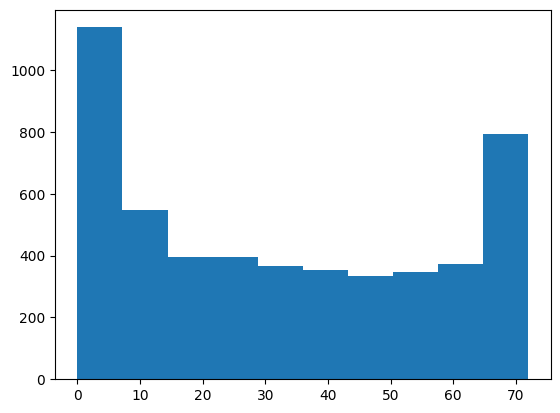

In [138]:
plt.hist(final_df['tenure'])



(array([1922.,  888.,  463.,  364.,  328.,  306.,  292.,  224.,  159.,
          89.]),
 array([  18.79999924,  883.92999931, 1749.05999939, 2614.18999947,
        3479.31999954, 4344.44999962, 5209.57999969, 6074.70999977,
        6939.83999985, 7804.96999992, 8670.1       ]),
 <BarContainer object of 10 artists>)

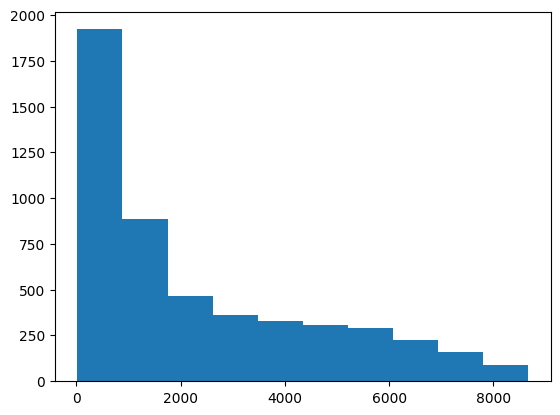

In [139]:
plt.hist(final_df['TotalCharges'])

Bi-Variate Analysis

In [52]:
correlation = final_df.corr(numeric_only=True)
correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.004597,0.221780,0.095212
tenure,0.004597,1.000000,0.240645,0.826264
MonthlyCharges,0.221780,0.240645,1.000000,0.647007
TotalCharges,0.095212,0.826264,0.647007,1.000000


<Axes: >

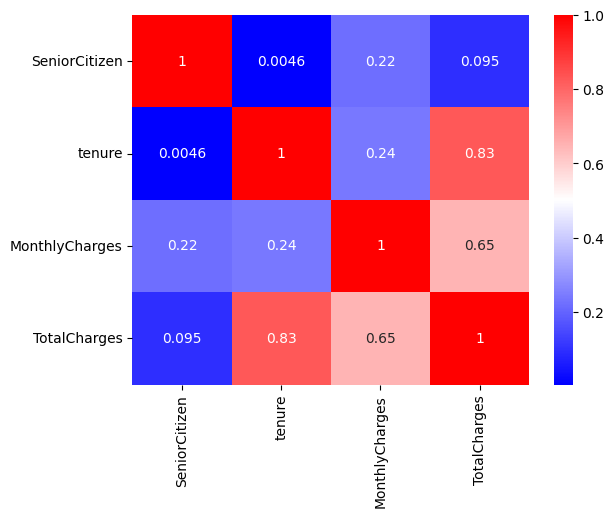

In [53]:
sns.heatmap(data=correlation, annot=True, cmap='bwr')

Insight

The dataset's correlation matrix shows that tenure and monthly and total charges have positive correlations; tenure and total charges have a greater link. Senior citizenship, on the other hand, has a somewhat positive correlation with both monthly and total charges.

Multivariate Analysis

<Figure size 1000x800 with 0 Axes>

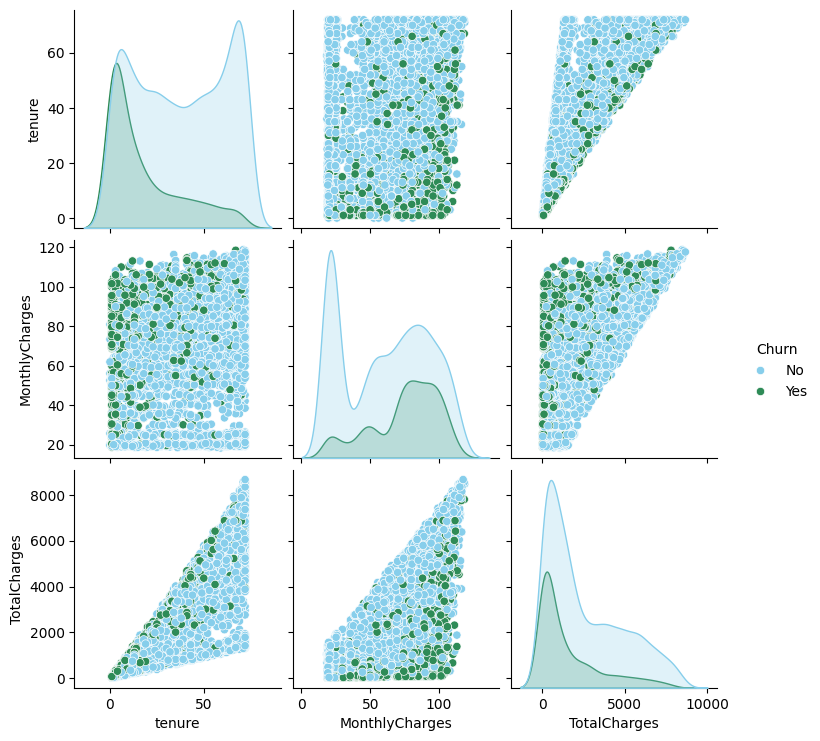

In [54]:
data= final_df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette= {'Yes':'seagreen', 'No':'skyblue'}, hue = 'Churn')
plt.show()

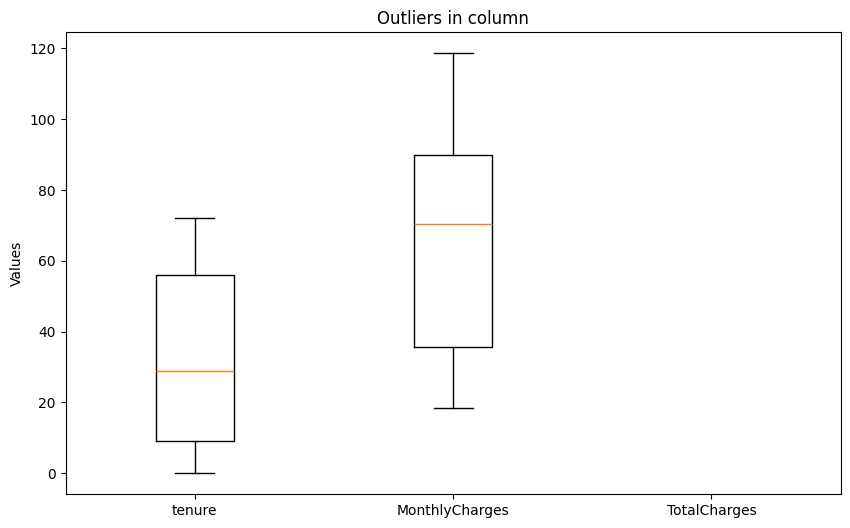

In [55]:
#checking for outliers
outlier_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

#ploting 
plt.figure(figsize=(10, 6))
plt.boxplot(final_df[outlier_columns].values, labels=outlier_columns)
plt.title('Outliers in column')
plt.ylabel('Values')
plt.show()

In [56]:
final_df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: Churn, Length: 5043, dtype: object

## Hypothesis Testing 

In [57]:
# Selecting relevant columns (Contract and Churn)
payment_churn = final_df[['Contract', 'Churn']]
 
# Creating a contingency table (cross-tabulation) between Contract and Churn
contingency_table = pd.crosstab(payment_churn['Contract'], payment_churn['Churn'])
 
# Performing chi-square test to determine correlation
chi2, p, dof, expected = chi2_contingency(contingency_table)
 
#With a significance vale of
alpha = 0.05
 
# Displaying the chi-square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
 

Chi-Square Statistic: 881.6208905118242
P-value: 3.61789584641233e-192


Due to the fact that the P value is more than 0.05 we fail to reject the Null Hypothesis

## Data Preparation

In [58]:
#spliting the data into input(X) and target (Y) features
X = final_df.drop(['Churn','customerID'],axis=1)

In [59]:
y=final_df['Churn']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#ML
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#utilities
import warnings
warnings.filterwarnings('ignore')

In [62]:
print(y.unique())  # Check the unique values in your target variable


['No' 'Yes' None]


In [63]:
final_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               1
dtype: int64

In [64]:
#NA value is replaced with the mode in other to enable the dataset to be splitted
final_df['Churn'].fillna(final_df['Churn'].mode()[0], inplace=True)

In [65]:
final_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [66]:
#Splitting the data to training and evaluation

X_train, X_evaluate, y_train, y_evaluate =train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Feature Engineering

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     5043 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    5043 non-null   object 
 9   OnlineBackup      5043 non-null   object 
 10  DeviceProtection  5043 non-null   object 
 11  TechSupport       5043 non-null   object 
 12  StreamingTV       5043 non-null   object 
 13  StreamingMovies   5043 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [68]:
# Grouping the X values into Numeric and categorical columns, , reason for this is enable the pipelines to be created sine they are in categorical and numeric aspects.
numeric_columns= X.select_dtypes(include='number').columns
numeric_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [69]:
categorical_columns=X.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [70]:
class LogTransformer():
    def __init__(self, constant=0.00050):
        self.constant = constant
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X + self.constant)

Machine learning pipeline

In [71]:
numeric_pipeline = Pipeline(steps=[
    ('numeric_Imputer', SimpleImputer(strategy='mean')),
    ('log_transformation', FunctionTransformer(LogTransformer().transform)),
    ('scaler', RobustScaler()),
])


categorical_pipeline = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])


preprocessor=ColumnTransformer([
    ('numeric_pipeline', numeric_pipeline, numeric_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns),
])

Label Encoding

In [72]:
#changing the values in the categorical values in the Y column to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_evaluate_encoded = label_encoder.transform(y_evaluate)

ML PIPILINE -UNBALANCED

In [73]:
#instantiate models to be trained
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


models = models =[
    ('Decision_tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
]

Training the Machine Learning Models

In [74]:
# training a logistic regression model
 
# Create a full pipeline including numerical transformation and Logistic Regression model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
   
])
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [75]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier())])

In [76]:
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [77]:
#train an SVC model
 
SVC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
   
])
# Fit the pipeline on the training data
SVC_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', SVC())])

In [78]:
#Predicting using the Machine Learning Models
pred = decision_tree_pipeline.predict(X_evaluate)
pred

array([0, 0, 0, ..., 1, 0, 1])

In [79]:
print(classification_report(y_evaluate_encoded,pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       742
           1       0.45      0.53      0.49       267

    accuracy                           0.70      1009
   macro avg       0.64      0.65      0.64      1009
weighted avg       0.72      0.70      0.71      1009



In [80]:
pred = SVC_pipeline.predict(X_evaluate)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
print(classification_report(y_evaluate_encoded,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       742
           1       0.67      0.53      0.59       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.73      1009
weighted avg       0.80      0.81      0.80      1009



In [82]:
pred = rf_pipeline.predict(X_evaluate)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [83]:
print(classification_report(y_evaluate_encoded,pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.62      0.52      0.57       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.72      1009
weighted avg       0.78      0.79      0.78      1009



In [84]:
pred = logistic_pipeline.predict(X_evaluate)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
print(classification_report(y_evaluate_encoded,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.55      0.59       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.79      1009



In [86]:
label_encoder.classes_
#Where 0 represents No and 1 represents 1

array(['No', 'Yes'], dtype=object)

Evaluation

In [87]:
models =[
    ('decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('svm_classifier', SVC(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
]

for name_of_model, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)

    ])

    pipeline.fit(X_train, y_train_encoded)

    y_pred = pipeline.predict(X_evaluate)

    print(f'Assessment for {name_of_model}')
    print(classification_report(y_evaluate_encoded, y_pred))
    print('='*45)
    

Assessment for decision_tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       742
           1       0.45      0.53      0.49       267

    accuracy                           0.70      1009
   macro avg       0.64      0.65      0.64      1009
weighted avg       0.72      0.70      0.71      1009

Assessment for logistic_classifier
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.64      0.55      0.59       267

    accuracy                           0.80      1009
   macro avg       0.74      0.72      0.73      1009
weighted avg       0.79      0.80      0.79      1009



Assessment for svm_classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       742
           1       0.67      0.53      0.59       267

    accuracy                           0.81      1009
   macro avg       0.76      0.72      0.73      1009
weighted avg       0.80      0.81      0.80      1009

Assessment for rf_classifier
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       742
           1       0.62      0.52      0.56       267

    accuracy                           0.79      1009
   macro avg       0.73      0.70      0.71      1009
weighted avg       0.78      0.79      0.78      1009



Analysis:

 The logistic classifier seems to perform well overall, avoiding false positives (precision) and correctly recognizing churn cases (recall). For both classes ('Yes' and 'No,' it strikes a nice balance between recall and precision. This is in contrast to other models where the 'No' class shows higher precision and recall, indicating superior predictive accuracy for the 'No' class at the possible expense of 'Yes' class performance.

## Balancing the dataset : this is done by either oversampling the minority class or undersampling the majority class


In [88]:
#checking the total number of not churn and churn counts
y_train.value_counts()

Churn
No     2965
Yes    1069
Name: count, dtype: int64

In [89]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Using randomoversampler to balance the dataset


sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train_encoded)

Comparing the initial total number of values against the resampled values

In [90]:
y_train.value_counts()

Churn
No     2965
Yes    1069
Name: count, dtype: int64

In [91]:
#calling the original X_train data
X_train.shape

(4034, 19)

In [92]:
#calling the resampled X_train data

X_train_resampled.shape

(5930, 19)

In [93]:
#comparing the number of churn and not churn count after resampling has been done
pd.DataFrame(y_train_resampled).value_counts()

0    2965
1    2965
Name: count, dtype: int64

Training and Comparing the models after Oversampling has been performed


In [94]:
models =[
    ('decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('svm_classifier', SVC(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
]

for name_of_model, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)

    ])

    pipeline.fit(X_train_resampled, y_train_resampled)

    y_pred = pipeline.predict(X_evaluate)

    print(f'Assessment for {name_of_model}')
    print(classification_report(y_evaluate_encoded, y_pred))
    print('='*45)

Assessment for decision_tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       742
           1       0.52      0.53      0.52       267

    accuracy                           0.74      1009
   macro avg       0.67      0.68      0.67      1009
weighted avg       0.75      0.74      0.75      1009

Assessment for logistic_classifier
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       742
           1       0.51      0.82      0.63       267

    accuracy                           0.74      1009
   macro avg       0.71      0.77      0.72      1009
weighted avg       0.81      0.74      0.76      1009



Assessment for svm_classifier
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       742
           1       0.51      0.79      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009

Assessment for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       742
           1       0.58      0.59      0.58       267

    accuracy                           0.78      1009
   macro avg       0.72      0.72      0.72      1009
weighted avg       0.78      0.78      0.78      1009



For our analysis we will consider using the F1 score as a basis  since is the harmonic average of  precision and recall, meaning that it reflects the model’s balanced ability to both capture positive cases (recall) and be accurate with the cases it does capture (precision)

The Logistic Regression  Classifier seems to perform relatively well across precision, recall, and F1-score for both classes, resulting in a higher overall F1 score  of 0.63


SVM shows balanced precision for both classes but has slightly lower performance compared to Random Forest.

Decision Tree performs decently but is outperformed by Random Forest.

## Feature selection and importance

In [95]:
#using kBest to select the top 10 features

selection = SelectKBest(mutual_info_classif, k=10)


models =[
    ('decision_tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('rf_classifier', RandomForestClassifier(random_state=42)),
]
model_metric ={}
 
for name_of_model, classifier in models:
    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('classifier', classifier)

    ])

    pipeline.fit(X_train_resampled, y_train_resampled)

    y_pred = pipeline.predict(X_evaluate)
    pred_proba = pipeline.predict_proba(X_evaluate)[:,1]
    fpr, tpr, threshold = roc_curve(y_evaluate_encoded, pred_proba)

    model_metric[name_of_model] = pd.DataFrame(zip(fpr, tpr, threshold), columns=['False Positive', 'True Positive', 'Threshold'])

    print(f'Assessment for {name_of_model}')
    print(classification_report(y_evaluate_encoded, y_pred))
    print('='*45)

Assessment for decision_tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       742
           1       0.46      0.52      0.49       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.65      1009
weighted avg       0.73      0.71      0.72      1009

Assessment for logistic_classifier
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.51      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009

Assessment for svm_classifier
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       742
           1       0.52      0.77      0.62       267

    accuracy                           0.75      1009
   macro avg       0.71

In [96]:

model_metric['decision_tree_classifier']

,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.216981,0.513109,1.000000
2,0.216981,0.520599,0.666667
3,0.216981,0.528090,0.500000
4,0.216981,0.531835,0.250000
5,1.000000,1.000000,0.000000


In [97]:
model_metric['logistic_classifier']

,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.952419
2,0.000000,0.014981,0.951613
3,0.001348,0.014981,0.951551
4,0.001348,0.044944,0.950120
...,...,...,...
275,0.688679,0.992509,0.106449
276,0.688679,0.996255,0.106174
277,0.885445,0.996255,0.031342
278,0.885445,1.000000,0.029790


In [98]:
model_metric['svm_classifier']

,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003745,0.824571
2,0.000000,0.011236,0.816213
3,0.001348,0.011236,0.816011
4,0.001348,0.022472,0.810409
...,...,...,...
275,0.960916,0.992509,0.147880
276,0.960916,0.996255,0.147683
277,0.973046,0.996255,0.141585
278,0.973046,1.000000,0.140666


In [99]:
model_metric['rf_classifier']

,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.002695,0.074906,1.00000
2,0.010782,0.097378,0.99000
3,0.010782,0.112360,0.98000
4,0.013477,0.112360,0.97375
...,...,...,...
111,0.633423,0.947566,0.04000
112,0.669811,0.958801,0.03000
113,0.707547,0.977528,0.02000
114,0.750674,0.992509,0.01000


Identifying the top 10 features used by  the models for prediction

In [100]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [101]:
selection.get_support(indices=True)

array([ 1,  2,  3, 16, 17, 27, 36, 37, 38, 43], dtype=int64)

In [102]:
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.000000,0.000000,0.203604,0.266444,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,-0.223771,-1.397069,-0.633001,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000000,-0.943540,0.205505,-0.543452,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.274663,-1.315139,-0.145914,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.492100,0.268820,0.692241,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,0.000000,-1.176485,0.324133,-0.710194,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4030,0.000000,-1.341755,0.086611,-0.979559,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4031,0.692897,-0.417093,0.328665,-0.047924,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4032,0.000000,-0.251804,-1.354016,-0.585310,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Visualizing  the models

Visualization for random forest classifier

In [103]:
rf_balanced_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('rf_classifier', RandomForestClassifier(random_state=42))
])

rf_balanced_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                ('rf_classifier', RandomForestClassifier(random_state=42))])

In [104]:
from sklearn.metrics import confusion_matrix

rf_y_pred = rf_balanced_pipeline.predict(X_evaluate)

  
print(confusion_matrix(y_evaluate_encoded, rf_y_pred))

[[616 126]
 [105 162]]


In [105]:
#classification report for 
print(classification_report(y_evaluate_encoded, rf_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       742
           1       0.56      0.61      0.58       267

    accuracy                           0.77      1009
   macro avg       0.71      0.72      0.71      1009
weighted avg       0.78      0.77      0.77      1009



ROC and AUC for Random forest

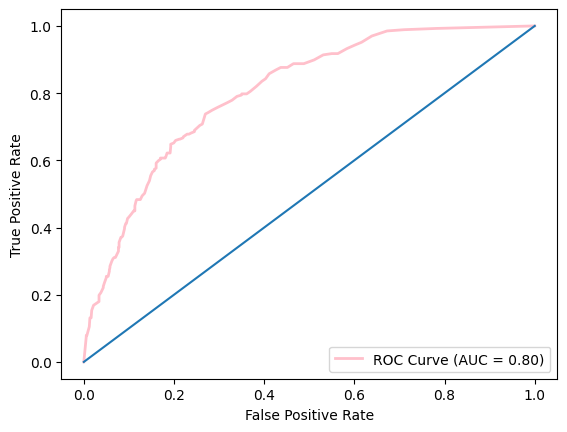

In [106]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = rf_balanced_pipeline.predict_proba(X_evaluate)[:, 1]
fpr, tpr, threshold = roc_curve(y_evaluate_encoded, y_pred_prob)
rf_roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1])
plt.show()

Visualising the Support Vector Classifier

In [107]:
SVC_balanced_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('svc_classifier', SVC(random_state=42, probability=True))
])

SVC_balanced_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                ('svc_classifier', SVC(probability=True, random_state=42))])

In [108]:
from sklearn.metrics import confusion_matrix

SVC_y_pred = SVC_balanced_pipeline.predict(X_evaluate)

  
print(confusion_matrix(y_evaluate_encoded, SVC_y_pred))

[[551 191]
 [ 61 206]]


In [109]:
print(classification_report(y_evaluate_encoded, SVC_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       742
           1       0.52      0.77      0.62       267

    accuracy                           0.75      1009
   macro avg       0.71      0.76      0.72      1009
weighted avg       0.80      0.75      0.76      1009



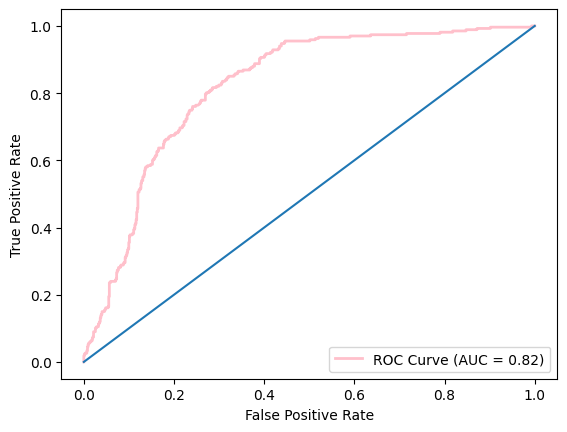

In [110]:
from sklearn.metrics import roc_curve, auc
y_pred_prob = SVC_balanced_pipeline.predict_proba(X_evaluate)[:, 1]
fpr, tpr, threshold = roc_curve(y_evaluate_encoded, y_pred_prob)
SVM_roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {SVM_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1])
plt.show()

Visualising logistic regression 

In [111]:
logistic_classifier_balanced_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('logistic_classifier', LogisticRegression(random_state=42))
])

logistic_classifier_balanced_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                ('logistic_classifier', LogisticRegression(random_state=42))])

In [112]:
from sklearn.metrics import confusion_matrix

logistic_y_pred = logistic_classifier_balanced_pipeline.predict(X_evaluate)

  
print(confusion_matrix(y_evaluate_encoded, logistic_y_pred))

[[536 206]
 [ 54 213]]


In [113]:
print(classification_report(y_evaluate_encoded, logistic_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       742
           1       0.51      0.80      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009



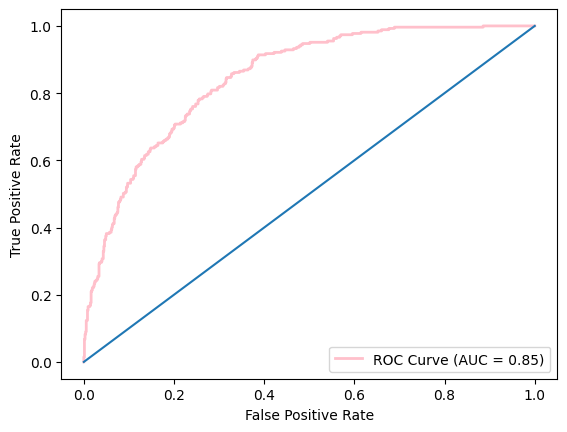

In [114]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = logistic_classifier_balanced_pipeline.predict_proba(X_evaluate)[:, 1]
fpr, tpr, threshold = roc_curve(y_evaluate_encoded, y_pred_prob)
logistic_roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {logistic_roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1])
plt.show()

Visualising Decision Tree Classifier

In [115]:
decision_tree_balanced_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('decision_tree_classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_balanced_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                ('decision_tree_classifier',
                 DecisionTreeClassifier(random_state=42))])

In [116]:
from sklearn.metrics import confusion_matrix

decision_tree_y_pred = decision_tree_balanced_pipeline.predict(X_evaluate)

  
print(confusion_matrix(y_evaluate_encoded, decision_tree_y_pred))

[[574 168]
 [125 142]]


In [117]:
print(classification_report(y_evaluate_encoded, decision_tree_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       742
           1       0.46      0.53      0.49       267

    accuracy                           0.71      1009
   macro avg       0.64      0.65      0.64      1009
weighted avg       0.73      0.71      0.72      1009



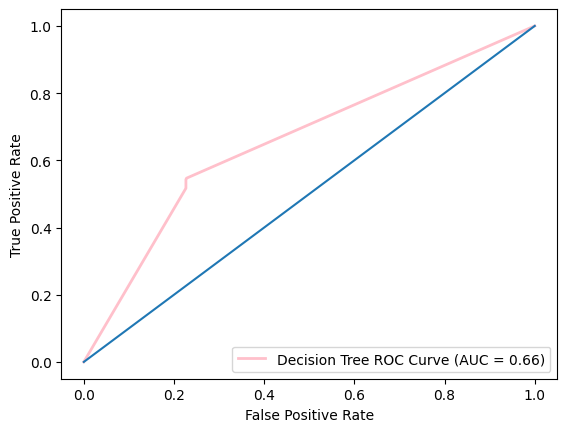

In [118]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = decision_tree_balanced_pipeline.predict_proba(X_evaluate)[:, 1]
fpr, tpr, threshold = roc_curve(y_evaluate_encoded, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='pink', lw=2, label=f'Decision Tree ROC Curve (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1])
plt.show()

Hyperparameter Tuning

In [119]:
from sklearn.model_selection import GridSearchCV


In [120]:
X_train_resampled.shape

(5930, 19)

In [121]:
y_train_resampled.shape

(5930,)

In [122]:
param_grid = {
    'feature_importance__k': [5, 10, 20],
    'logistic_classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_classifier__penalty': ['l1', 'l2'],
    'logistic_classifier__max_iter': [100, 200, 300],
}

grid_search = GridSearchCV(
    logistic_classifier_balanced_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1')

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric_pipeline',
                                                                         Pipeline(steps=[('numeric_Imputer',
                                                                                          SimpleImputer()),
                                                                                         ('log_transformation',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         Index(['SeniorCiti...
                                       ('feature_importance',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                                       ('logistic_classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'feature_importance__k': [5, 10, 20],
                         'logistic_classifier__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                         'logistic_classifier__max_iter': [100, 200, 300],
                         'logistic_classifier__penalty': ['l1', 'l2']},
             scoring='f1')

In [123]:
best_parameters = grid_search.best_params_
best_parameters

{'feature_importance__k': 20,
 'logistic_classifier__C': 0.1,
 'logistic_classifier__max_iter': 300,
 'logistic_classifier__penalty': 'l2'}

In [124]:
best_estimator = grid_search.best_estimator_


test_accuracy = best_estimator.score(X_evaluate, y_evaluate_encoded)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.7383548067393458


After the hyper parameter tuning the Model accuracy is 0.7383548067393458

In [125]:
logistic_classifier_balanced_pipeline.set_params(**best_parameters)
logistic_classifier_balanced_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('numeric_Imputer',
                                                                   SimpleImputer()),
                                                                  ('log_transformation',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x0000011BDB53CB90>>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharge...
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k=20,
                             score_func=<function mutual_info_classif at 0x0000011BFE749B20>)),
                ('logistic_classifier',
                 LogisticRegression(C=0.1, max_iter=300, random_state=42))])

Model Persistence

In [126]:
import joblib

In [127]:

joblib.dump(logistic_classifier_balanced_pipeline, './Models/completed_model.joblib')

joblib.dump(label_encoder, './Models/encoder.joblib')

['./Models/encoder.joblib']

Evaluating the model with the test dataset

In [128]:
# Load the logistic regression pipeline
new_logistic_pipeline = joblib.load('./Models/completed_model.joblib')

# Load the label encoder
new_label_encoder = joblib.load('./Models/encoder.joblib')

In [129]:
data_3.loc[data_3['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
1380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,


In [130]:
data_3.shape

(2000, 20)

In [131]:
#Dropping the 3 empty rows due to empty cells onthe Total charge columns
data_3.drop([331,826,1380 ], inplace=True)

In [132]:
third_dataset_testing = new_logistic_pipeline.predict(data_3)
third_dataset_testing_r=new_label_encoder.inverse_transform(third_dataset_testing)

In [133]:
third_dataset_testing_r

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [134]:
pd.DataFrame(third_dataset_testing_r).value_counts()

No     1158
Yes     839
Name: count, dtype: int64

After the feature selection and hyperparameter tuning was done, the model with the best performing ability was the Logistic Regression model with an AUC-ROC score of 0.85. This model was then used to perform prediction on the on the Test data, the outcome was out of 1497 customers the model predicted that 839  customers will churn.
We advise the business to utilize the logistic regression model to pinpoint the clients who are most likely to leave and put retention plans in place, based on the knowledge gained from the research. Some customer retention ideas include providing clients with special offers, discounts, or customized services.
